# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('C:/Users/isabe/OneDrive/Документы/ironhack/LEaRNGIT/lab 20/lab-classification/data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# Your code here
print(websites.head())

print(websites.info())

print(websites.describe())

for column in websites.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in column '{column}':")
    print(websites[column].unique())


       URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       UTF-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  ISO-8859-1   
4   B0_403          17                          6       UTF-8   

                  SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                  nginx           263.0           NaN            NaN   
1          Apache/2.4.10         15087.0           NaN            NaN   
2  Microsoft-HTTPAPI/2.0           324.0           NaN            NaN   
3                  nginx           162.0            US             AK   
4                    NaN        124140.0            US             TX   

      WHOIS_REGDATE WHOIS_UPDATED_DATE  ...  DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
0  10/10/2015 18:21                NaN  ...                     0           2   
1       

"1- What the dataset looks like?

The dataset contains information about websites, with columns detailing various features of the sites, such as URL, server type, whois registration dates, and network-related metrics. It also includes numeric data related to network activity (like APP_BYTES and SOURCE_APP_PACKETS) and other details that might indicate website characteristics.

2- What are the data types?

The data includes a mix of data types:
String (e.g., URL, CHARSET, SERVER, WHOIS_COUNTRY, WHOIS_STATEPRO, WHOIS_REGDATE, WHOIS_UPDATED_DATE)
Float (e.g., CONTENT_LENGTH)
Integer (e.g., URL_LENGTH, NUMBER_SPECIAL_CHARACTERS, DIST_REMOTE_TCP_PORT, APP_BYTES)
Date columns (e.g., WHOIS_REGDATE, WHOIS_UPDATED_DATE) appear to be in string format and may need conversion to a date format for analysis.

3-Which columns contain the features of the websites?

The columns related to website features include:
URL, URL_LENGTH, NUMBER_SPECIAL_CHARACTERS, CHARSET, SERVER, CONTENT_LENGTH, WHOIS_COUNTRY, WHOIS_STATEPRO, WHOIS_REGDATE, WHOIS_UPDATED_DATE, and network-related columns like DIST_REMOTE_TCP_PORT, APP_BYTES, SOURCE_APP_PACKETS, REMOTE_APP_PACKETS, etc.
These features might be useful in a predictive model to distinguish between different types of websites.

4-Which column contains the feature we will predict? What is the code standing for benign vs. malicious websites?

While it’s not visible in the snapshot, typically, a dataset like this will have a column that labels each website as either "benign" or "malicious." This column could be named something like label or target. The specific codes or labels (e.g., 0 for benign, 1 for malicious) need confirmation based on dataset documentation or an examination of unique values in the target column.

5-Do we need to transform any of the columns from categorical to ordinal values? If so, what are these columns?

Yes, several columns may need transformation from categorical to ordinal/numerical values to use them in a model. These include:
CHARSET, SERVER, WHOIS_COUNTRY, and WHOIS_STATEPRO.
Date columns (WHOIS_REGDATE and WHOIS_UPDATED_DATE) might need to be converted to numerical formats, such as the number of days since registration or update, to capture time-based information in a meaningful way."

v

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

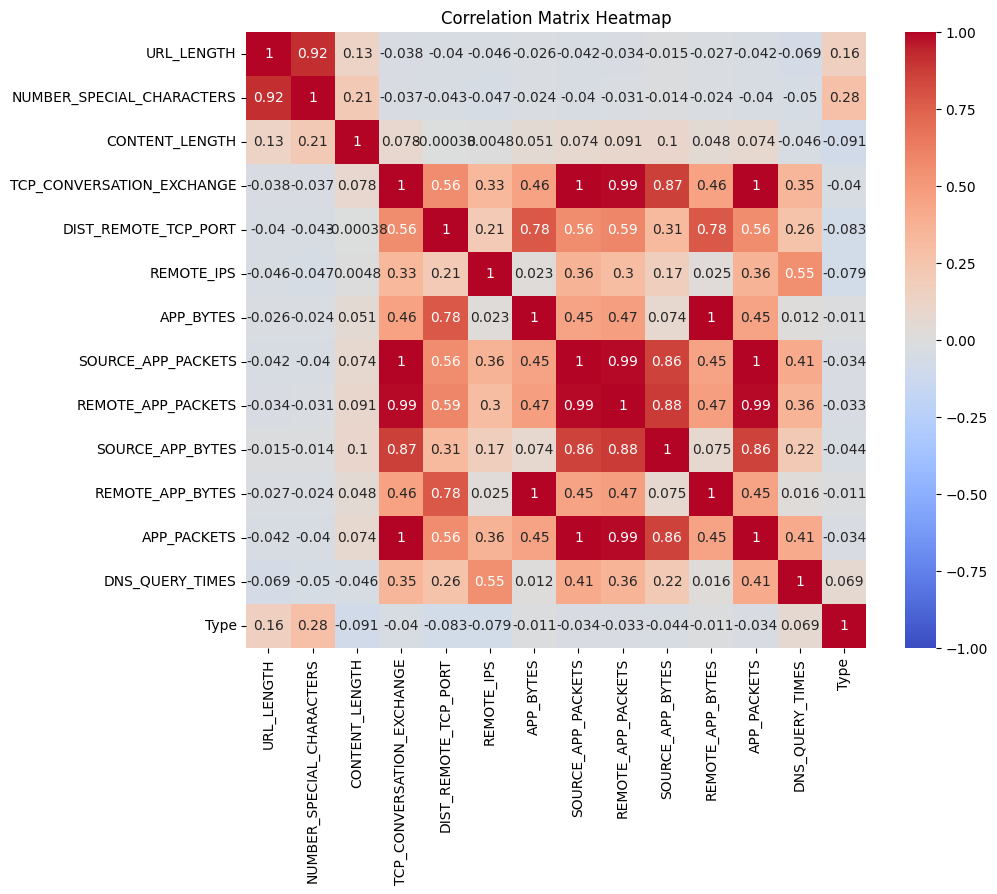

In [ ]:
# Your code here
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = websites.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()



 Columns that are highly collinear (correlation > 0.9) could be removed to simplify the model and reduce redundancy. This would involve dropping one of each highly correlated pair, such as REMOTE_APP_PACKETS, REMOTE_APP_BYTES, APP_PACKETS, and NUMBER_SPECIAL_CHARACTERS, to reduce redundancy in the dataset.

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

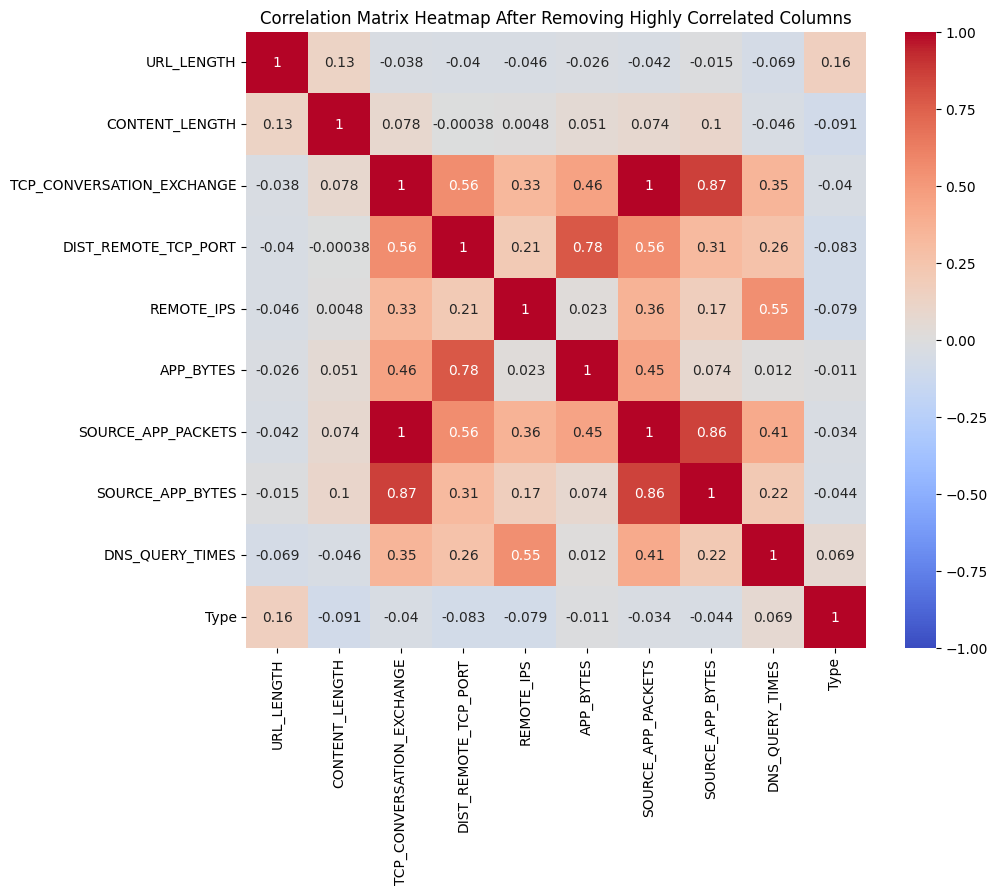

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

websites_reduced = websites.copy()

columns_to_drop = ['REMOTE_APP_PACKETS', 'REMOTE_APP_BYTES', 'APP_PACKETS', 'NUMBER_SPECIAL_CHARACTERS']
websites_reduced.drop(columns=columns_to_drop, axis=1, inplace=True)

numeric_columns = websites_reduced.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap After Removing Highly Correlated Columns")
plt.show()


The code provided tackles high collinearity in the dataset by selectively removing highly correlated columns based on the initial correlation heatmap. High collinearity can lead to redundancy, affecting the performance and interpretability of machine learning models. In the first heatmap, certain columns were identified as highly correlated with others, suggesting they contained overlapping information.

To address this, I chose to remove specific columns. I removed 'REMOTE_APP_PACKETS' and 'REMOTE_APP_BYTES', as both showed high correlation with other network-related metrics, indicating that they might not contribute unique information. I also removed 'APP_PACKETS', another metric highly correlated with packet and byte counts, and 'NUMBER_SPECIAL_CHARACTERS', which was highly correlated with URL_LENGTH, likely representing similar information about URL structure complexity.

After removing these columns, I generated an updated heatmap to visually check if the high collinearity had been reduced. The new heatmap showed a more balanced distribution of correlations, with fewer cases of near-perfect correlations between columns. This indicates that removing these columns helped reduce redundancy, simplifying the dataset for future analysis and model building. This iterative process of removing and visualizing the results ensures that the dataset retains unique, non-overlapping information, which can ultimately improve model performance and generalizability.

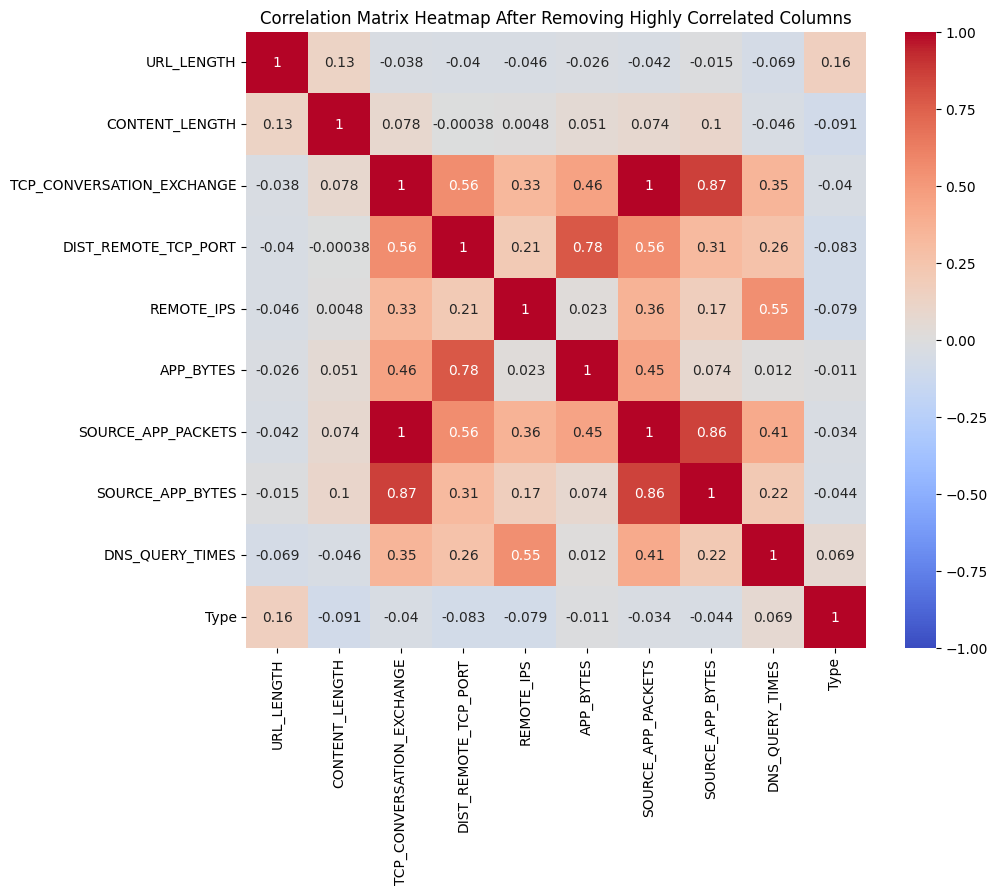

In [8]:
# Print heatmap again
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap After Removing Highly Correlated Columns")
plt.show()

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [ ]:
# Your code here
missing_counts = websites_reduced.isnull().sum()
print(missing_counts[missing_counts > 0])


CHARSET                 7
SERVER                176
CONTENT_LENGTH        812
WHOIS_COUNTRY         306
WHOIS_STATEPRO        362
WHOIS_REGDATE         127
WHOIS_UPDATED_DATE    139
DNS_QUERY_TIMES         1
dtype: int64


If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [ ]:
# Your code here
# Drop columns with more than 40% missing values
threshold = len(websites_reduced) * 0.4
websites_reduced = websites_reduced.dropna(axis=1, thresh=threshold)

# Drop columns with a high proportion of missing values (e.g., more than 40%)
threshold = len(websites_reduced) * 0.4
websites_reduced = websites_reduced.dropna(axis=1, thresh=threshold)

# Fill missing values for numerical columns with the mean
numeric_cols = websites_reduced.select_dtypes(include=['float64', 'int64']).columns
websites_reduced[numeric_cols] = websites_reduced[numeric_cols].fillna(websites_reduced[numeric_cols].mean())

# Fill missing values for categorical columns with the mode
categorical_cols = websites_reduced.select_dtypes(include=['object']).columns
for col in categorical_cols:
    websites_reduced[col] = websites_reduced[col].fillna(websites_reduced[col].mode()[0])


# Verify the data after filling missing values
print(websites_reduced.isnull().sum())



URL                          0
URL_LENGTH                   0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


In this data cleaning process, the decisions were made based on the type and proportion of missing data in the dataset, as well as the need to prepare the data for machine learning without losing too much valuable information. First, columns with a high proportion of missing values, specifically over 40%, were dropped. This is because such columns are likely to introduce noise if we attempt to fill in the gaps, as there may not be enough data to impute them accurately. Dropping these columns helps retain the dataset's integrity and reduces the risk of bias or misleading information. This rule was applied twice to ensure any remaining columns meeting this criterion after the initial drop were also removed.

For columns with numerical data, missing values were filled with the mean. This approach maintains the overall distribution of the data by providing a central value without skewing the distribution excessively. Filling with the mean is appropriate when there is a low proportion of missing values, as it ensures that rows are not lost unnecessarily, which could impact the model's performance.

For categorical data, missing values were filled with the mode, the most frequent value. This method preserves the most common category in each column, aligning well with the existing distribution of the data. Filling with the mode minimizes the introduction of new or rare categories, ensuring consistency in the dataset and more reliable model training.

After completing these imputation steps, the remaining null values were printed to confirm that all missing data had been addressed. This final verification step ensures that the dataset is ready for further analysis or machine learning without any issues related to missing values. This process standardizes the data, ensuring quality and consistency, while making the dataset suitable for machine learning or further analysis.

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [16]:
# Examine missing values in each column

missing_values = websites_reduced.isnull().sum()
missing_values


URL                          0
URL_LENGTH                   0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [ ]:
# Your code here
print("Unique values in WHOIS_COUNTRY before cleaning:")
print(websites_reduced['WHOIS_COUNTRY'].unique())

country_mapping = {
    'Cyprus': 'CY', 'CY': 'CY',
    'us': 'US', 'US': 'US',
    'se': 'SE', 'SE': 'SE',
    'GB': 'UK', 'United Kingdom': 'UK', 'u\'GB\'; u\'UK\'': 'UK'
}

websites_reduced['WHOIS_COUNTRY'] = websites_reduced['WHOIS_COUNTRY'].replace(country_mapping)

print("\nUnique values in WHOIS_COUNTRY after cleaning:")
print(websites_reduced['WHOIS_COUNTRY'].unique())


Unique values in WHOIS_COUNTRY before cleaning:
['US' 'SC' 'GB' 'UK' 'RU' 'AU' 'CA' 'PA' 'se' 'IN' 'LU' 'TH'
 "[u'GB'; u'UK']" 'FR' 'NL' 'UG' 'JP' 'CN' 'SE' 'SI' 'IL' 'ru' 'KY' 'AT'
 'CZ' 'PH' 'BE' 'NO' 'TR' 'LV' 'DE' 'ES' 'BR' 'us' 'KR' 'HK' 'UA' 'CH'
 'United Kingdom' 'BS' 'PK' 'IT' 'Cyprus' 'BY' 'AE' 'IE' 'UY' 'KG']

Unique values in WHOIS_COUNTRY after cleaning:
['US' 'SC' 'UK' 'RU' 'AU' 'CA' 'PA' 'SE' 'IN' 'LU' 'TH' "[u'GB'; u'UK']"
 'FR' 'NL' 'UG' 'JP' 'CN' 'SI' 'IL' 'ru' 'KY' 'AT' 'CZ' 'PH' 'BE' 'NO'
 'TR' 'LV' 'DE' 'ES' 'BR' 'KR' 'HK' 'UA' 'CH' 'BS' 'PK' 'IT' 'CY' 'BY'
 'AE' 'IE' 'UY' 'KG']


Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

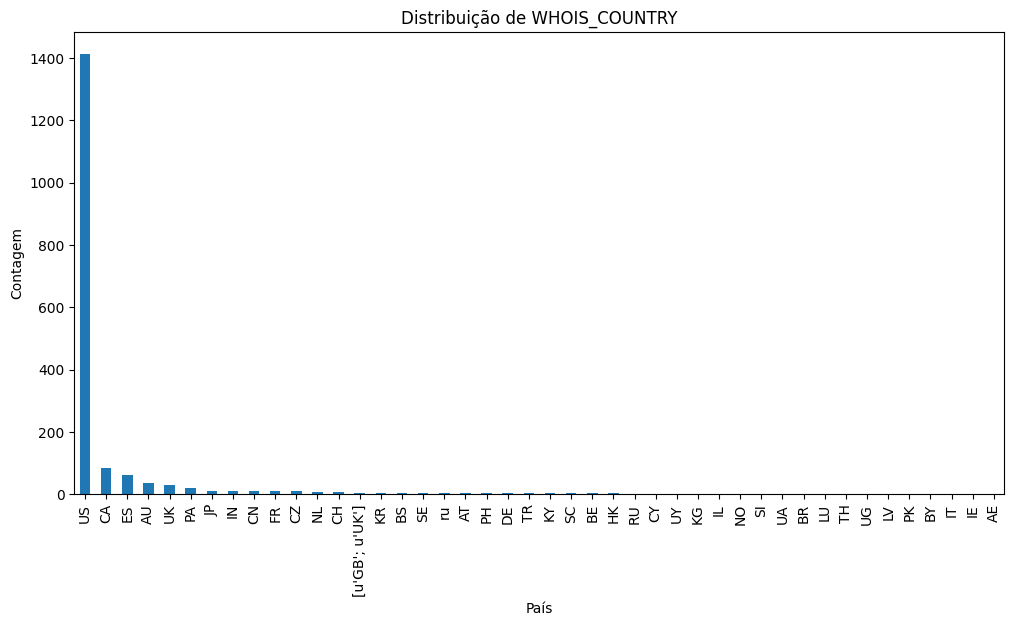

In [19]:
# Your code here
import matplotlib.pyplot as plt

country_counts = websites_reduced['WHOIS_COUNTRY'].value_counts()

plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.title('Distribuição de WHOIS_COUNTRY')
plt.xlabel('País')
plt.ylabel('Contagem')
plt.show()


#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [22]:
# Your code here
top_10_countries = websites_reduced['WHOIS_COUNTRY'].value_counts().nlargest(10).index

websites_reduced['WHOIS_COUNTRY'] = websites_reduced['WHOIS_COUNTRY'].apply(lambda x: x if x in top_10_countries else 'OTHER')

print(websites_reduced['WHOIS_COUNTRY'].value_counts())


WHOIS_COUNTRY
US       1412
OTHER     105
CA         84
ES         63
AU         35
UK         30
PA         21
JP         11
IN         10
CN         10
Name: count, dtype: int64


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [28]:
# Your code here
columns_to_drop = ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']
websites_reduced.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

print(websites_reduced.head())



       URL  URL_LENGTH     CHARSET                 SERVER  CONTENT_LENGTH  \
0   M0_109          16  iso-8859-1                  nginx           263.0   
1  B0_2314          16       UTF-8          Apache/2.4.10         15087.0   
2   B0_911          16    us-ascii  Microsoft-HTTPAPI/2.0           324.0   
3   B0_113          17  ISO-8859-1                  nginx           162.0   
4   B0_403          17       UTF-8                 Apache        124140.0   

  WHOIS_COUNTRY  TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
0            US                          7                     0           2   
1            US                         17                     7           4   
2            US                          0                     0           0   
3            US                         31                    22           3   
4            US                         57                     2           5   

   APP_BYTES  SOURCE_APP_PACKETS  SOURCE_APP_BYTES  DNS_

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [ ]:
# Your code here
print(websites_reduced.dtypes)


URL                           object
URL_LENGTH                     int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [ ]:
# Your code here
websites_reduced.drop(columns=['URL'], inplace=True)


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [ ]:
# Your code here
print(websites_reduced['CHARSET'].value_counts())


CHARSET
UTF-8           683
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
windows-1251      1
ISO-8859          1
windows-1252      1
Name: count, dtype: int64


`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [ ]:
# Your code here
print(websites_reduced['SERVER'].value_counts())


SERVER
Apache                                                           562
nginx                                                            211
Microsoft-HTTPAPI/2.0                                            113
cloudflare-nginx                                                  94
Microsoft-IIS/7.5                                                 51
                                                                ... 
My Arse                                                            1
IdeaWebServer/v0.80                                                1
Apache/2.4.17 (Unix) OpenSSL/1.0.1e-fips PHP/5.6.19                1
Microsoft-IIS/7.5; litigation_essentials.lexisnexis.com  9999      1
Apache/2.2.16 (Debian)                                             1
Name: count, Length: 238, dtype: int64


![Think Hard](../images/think-hard.jpg)

To handle the SERVER column, the first step is to list the unique values to gain a better understanding of the variety and distribution of the values present. This will allow us to identify patterns or broader categories that can be consolidated.

Based on these values, we can consider consolidating common categories, such as servers with the same name but different versions (e.g., Apache and Apache/2.4.1 could be grouped as Apache). Additionally, low-frequency servers can be categorized as "OTHER" to simplify the dataset, making it more manageable for analysis and machine learning models.

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [ ]:
# Your code here
websites_reduced['SERVER'] = websites_reduced['SERVER'].apply(
    lambda x: 'Microsoft' if 'microsoft' in str(x).lower() else
              'Apache' if 'apache' in str(x).lower() else
              'nginx' if 'nginx' in str(x).lower() else
              'Other'
)

In [ ]:
# Count `SERVER` value counts here
print(websites_reduced['SERVER'].value_counts())


SERVER
Apache       819
nginx        436
Other        328
Microsoft    198
Name: count, dtype: int64


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [ ]:
# Your code here
website_dummy = pd.get_dummies(websites_reduced)


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [ ]:
# Your code here
print(website_dummy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1781 non-null   int64  
 1   CONTENT_LENGTH             1781 non-null   float64
 2   TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 3   DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 4   REMOTE_IPS                 1781 non-null   int64  
 5   APP_BYTES                  1781 non-null   int64  
 6   SOURCE_APP_PACKETS         1781 non-null   int64  
 7   SOURCE_APP_BYTES           1781 non-null   int64  
 8   DNS_QUERY_TIMES            1781 non-null   float64
 9   Type                       1781 non-null   int64  
 10  CHARSET_ISO-8859           1781 non-null   bool   
 11  CHARSET_ISO-8859-1         1781 non-null   bool   
 12  CHARSET_UTF-8              1781 non-null   bool   
 13  CHARSET_iso-8859-1         1781 non-null   bool 

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [ ]:
from sklearn.model_selection import train_test_split

# Your code here:
X = website_dummy.drop(columns='Type')
y = website_dummy['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [38]:
# Your code here:
from sklearn.linear_model import LogisticRegression

# Initialize the model
logistic_model = LogisticRegression()



Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [ ]:
# Your code here:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=500)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [ ]:
# Your code here:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = logistic_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy Score:", accuracy)



Confusion Matrix:
 [[306   0]
 [ 51   0]]

Accuracy Score: 0.8571428571428571


What are your thoughts on the performance of the model? Write your conclusions below.

The model’s performance, as reflected in the confusion matrix and accuracy score, indicates some issues despite the seemingly high accuracy score of 85.7%. Although this suggests the model is correctly predicting a large portion of the labels, a closer look reveals that it is biased toward the majority class (negative). In the confusion matrix, the model correctly classified 306 instances as negative but failed to identify any of the positive instances, leading to 51 False Negatives. This means the model is predicting only the negative class and completely missing the positive class.

This behavior suggests a class imbalance issue in the dataset, where the model has learned to focus on the majority class to achieve higher accuracy, neglecting the minority (positive) class. In such cases, accuracy alone is misleading, as it does not reflect the model's inability to identify positive cases. This could be problematic if the positive class represents a critical condition, such as a rare disease or a fraudulent transaction.

To address this issue, it would be beneficial to try re-sampling techniques, such as SMOTE or random over-sampling/under-sampling, to balance the dataset. Additionally, evaluating the model with metrics like precision, recall, and F1-score could provide a clearer picture of its performance, especially for the minority class.

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [ ]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [ ]:
# Your code here:
y_pred_knn = knn_model.predict(X_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Confusion Matrix for KNN (k=3):\n", conf_matrix_knn)
print("\nAccuracy Score for KNN (k=3):", accuracy_knn)


Confusion Matrix for KNN (k=3):
 [[295  11]
 [ 20  31]]

Accuracy Score for KNN (k=3): 0.9131652661064426


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [ ]:
# Your code here:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

knn_model_k5 = KNeighborsClassifier(n_neighbors=5)

knn_model_k5.fit(X_train, y_train)

y_pred_knn_k5 = knn_model_k5.predict(X_test)

conf_matrix_knn_k5 = confusion_matrix(y_test, y_pred_knn_k5)
accuracy_knn_k5 = accuracy_score(y_test, y_pred_knn_k5)

print("Confusion Matrix for KNN (k=5):\n", conf_matrix_knn_k5)
print("\nAccuracy Score for KNN (k=5):", accuracy_knn_k5)


Confusion Matrix for KNN (k=5):
 [[299   7]
 [ 18  33]]

Accuracy Score for KNN (k=5): 0.9299719887955182


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

By increasing k to 5 in the K-Nearest Neighbors model, there was a noticeable improvement in the model's performance compared to the results from k=3. The confusion matrix shows that the model correctly classified more instances, especially within the positive class, where the number of true positives increased. The model now has 299 true negatives, 7 false positives, 18 false negatives, and 33 true positives.

Additionally, the accuracy score has increased to 0.93, indicating that the model is better at distinguishing between the two classes with a higher value of 𝑘. This suggests that a slightly larger neighborhood (5 neighbors) allows the model to generalize better, likely reducing some of the noise that may have affected the performance with 𝑘=3. This improvement in both the confusion matrix and accuracy score indicates that increasing 𝑘 from 3 to 5 was beneficial for this dataset.

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [38]:
# Your code here